# TMA4135 Exercise 9:
### Author: Simen Kristiansen Sandhaug 


---

## Problem 1. (Periodic functions)

Recall that a function $ f: \mathbb{R} \rightarrow \mathbb{R} $ is called periodic, if there exists $ p > 0 $ (a period of $ f $) such that

$$
f(x + p) = f(x) \quad \text{for all} \quad x \in \mathbb{R}.
$$

Moreover, the smallest positive number for which this statement holds (if it exists), is called the fundamental period of $ f $.

- **a)** Decide whether the following statement is true or false, and then find either a proof or a counterexample: Every periodic function has a fundamental period.
- **b)** What is the fundamental period of the following functions:
    - $ f(x) = \sin(3x+2) $
    - $ f(x) = \pi\cos(2 \pi x) $
    - $ f(x) = \cos(\frac{2\pi}{m+1}x) + \sin(\frac{2\pi}{n-1}x), \quad n,m \in \mathbb{N} \, \backslash \{1\} $  

### Solution

**a)** The statement is **false**: Every periodic function does not have a fundamental period.

**Proof:**
$f(x) = c$, where c is a constant has infinite periods $p > 0$ where the function repeats, i.e $f(x + p) = f(x)$. However there is no finite $p > 0$ that is the smallest such period.

**b)**

- For $ f(x) = \sin(3x+2) $, the fundamental period is $\frac{2\pi}{3} $.
- For $ f(x) = \pi\cos(2 \pi x) $, the fundamental period is $ \frac{2\pi}{2\pi} = 1 $.
- For $ f(x) = \cos\left(\frac{2\pi}{m+1}x\right) + \sin\left(\frac{2\pi}{n-1}x\right) $, the fundamental period is $ \text{LCM}(m+1, n-1) $.

**Comment:**

The fundamental period $ T $ for the separate functions is:

$$
T = 
\begin{cases} 
\frac{2\pi}{\frac{2\pi}{m+1}} = m + 1 & \text{for} \cos\left(\frac{2\pi}{m+1}x\right) \\
\frac{2\pi}{\frac{2\pi}{n-1}} = n - 1 & \text{for} \sin\left(\frac{2\pi}{n-1}x\right) \\
\end{cases}
$$

The LCM of $ (m+1) $ and $ (n-1) $ is the smallest positive number for which the function $ f(x) $ repeats its values. This occurs because $ \cos $ and $ \sin $ are linearly independent over any interval of length $ \pi $ or more, causing $ f(x) $ to repeat its values precisely when both $ \cos\left(\frac{2\pi}{m+1}x\right) $ and $ \sin\left(\frac{2\pi}{n-1}x\right) $ simultaneously repeat their values.


---

## Problem 2. (Fourier series)

For each of the $ 2\pi $-periodic functions below, which are given on $[- \pi, \pi]$ and are meant as their periodic continuation, sketch the function over $-3\pi < x < 3\pi$ and find their Fourier series. In each case, plot the truncated series

$$
S_N(x) = a_0 + \sum_{n=1}^{N} (a_n \cos(nx) + b_n \sin(nx))
$$

for $ N = 5 $, $ N = 20 $ and $ N = 100 $.

- **a)** 
$
f(x) = 
\begin{cases} 
0 & \text{if } - \pi < x < 0 \text{ or } \frac{\pi}{2} < x \leq \pi, \\
x & \text{if } 0 \leq x \leq \frac{\pi}{2}.
\end{cases}
$

- **b)** 
$
f(x) = 
\begin{cases} 
0 & \text{if } - \pi < x < 0, \\
x & \text{if } 0 < x < \frac{\pi}{2}, \\
\pi - x & \text{if } \frac{\pi}{2} < x \leq \pi.
\end{cases}
$

- **c)** 
$
f(x) = 
\begin{cases} 
-\pi - x & \text{if } - \pi < x < - \frac{\pi}{2}, \\
x & \text{if } - \frac{\pi}{2} < x < \frac{\pi}{2}, \\
\pi - x & \text{if } \frac{\pi}{2} < x \leq \pi.
\end{cases}
$

### Solution




In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 7]

def plot_partial_sum(f, x, S_N, N, title=""):
    y = f(x)
    s_N = S_N(x, N)
    plt.figure(figsize=(15, 7))
    plt.plot(x, y, label="$f$", color='b')
    plt.plot(x, s_N, label="$S_N$", color='r', linestyle='--')
    plt.title(title)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("$S_N(x)$")
    
    # Use pi symbol on the x-axis
    plt.xticks(
        [-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
        [r'$-3\pi$', r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$']
    )
    
    plt.yticks(
        [-np.pi/2, 0, np.pi/2],
        [r'$-\pi/2$', r'$0$', r'$\pi/2$']
    )
    
    plt.grid(True)
    plt.show()
    
x = np.linspace(-3.0*np.pi, 3.0*np.pi, 5000) # Interval
P = 2.0*np.pi # Period
Ns = [5, 20, 100]

#### Function $f(x)$ for Case a)

$$
f(x) =
\begin{cases} 
0 & \text{if $-\pi < x < 0$ or $\frac{\pi}{2} < x \leq \pi$} \\
x & \text{if $0 \leq x \leq \frac{\pi}{2}$}
\end{cases}
$$

$$
a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, dx = \frac{1}{\pi} \left( \int_{-\pi}^{0} 0 \, dx + \int_{0}^{\frac{\pi}{2}} x \, dx + \int_{\frac{\pi}{2}}^{\pi} 0 \, dx \right) = \frac{1}{\pi} \cdot \left [ \frac{1}{2}x^2\right ]_0^{\frac{\pi}{2}} = \frac{1}{2\pi} \cdot \frac{\pi^2}{4} = \frac{\pi}{8}
$$

### Calculating $ a_n $ and $ b_n $

The $ a_n $ and $ b_n $ terms for the Fourier series are calculated using the following integrals:

$$
a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos(nx) \, dx
$$
$$
b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin(nx) \, dx
$$

Since $ f(x) $ is a piecewise function, we need to consider each segment separately for the integration:

#### For $ a_n $:

$$
a_n = \frac{1}{\pi} \left( \int_{-\pi}^{0} 0 \cos(nx) \, dx + \int_{0}^{\frac{\pi}{2}} x \cos(nx) \, dx + \int_{\frac{\pi}{2}}^{\pi} 0 \cos(nx) \, dx \right)
$$

After performing the integrals, we get:

$$
a_n = \frac{-2 + 2\cos(\frac{n \pi}{2}) + n \pi \sin(\frac{n \pi}{2})}{2 n^2 \pi}
$$

#### For $ b_n $:

$$
b_n = \frac{1}{\pi} \left( \int_{-\pi}^{0} 0 \sin(nx) \, dx + \int_{0}^{\frac{\pi}{2}} x \sin(nx) \, dx + \int_{\frac{\pi}{2}}^{\pi} 0 \sin(nx) \, dx \right)
$$

After performing the integrals, we get:

$$
b_n = \frac{-\frac{1}{2} n \pi \cos(\frac{n \pi}{2}) + \sin({\frac{n \pi}{2}})}{n^2 \pi}
$$



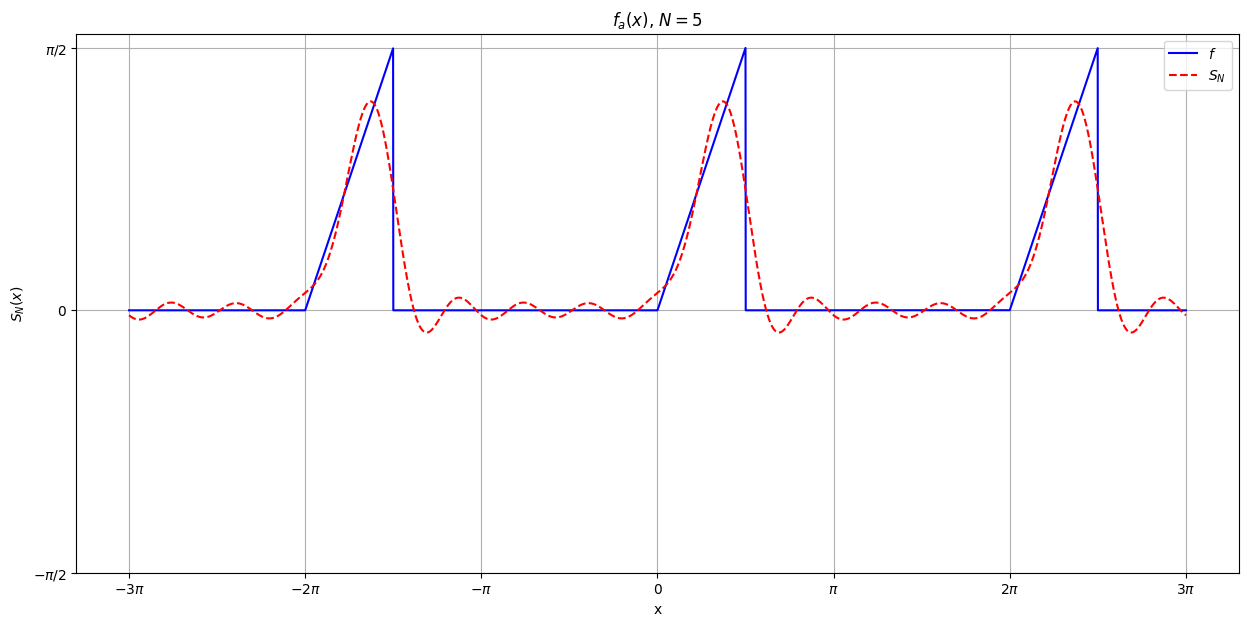

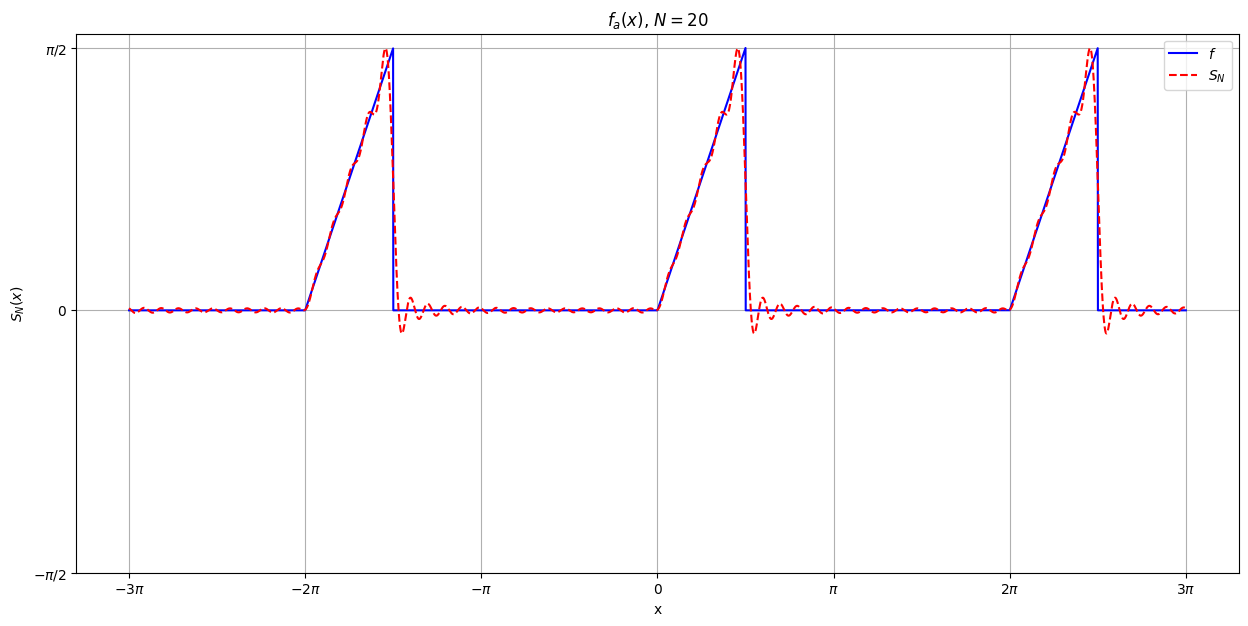

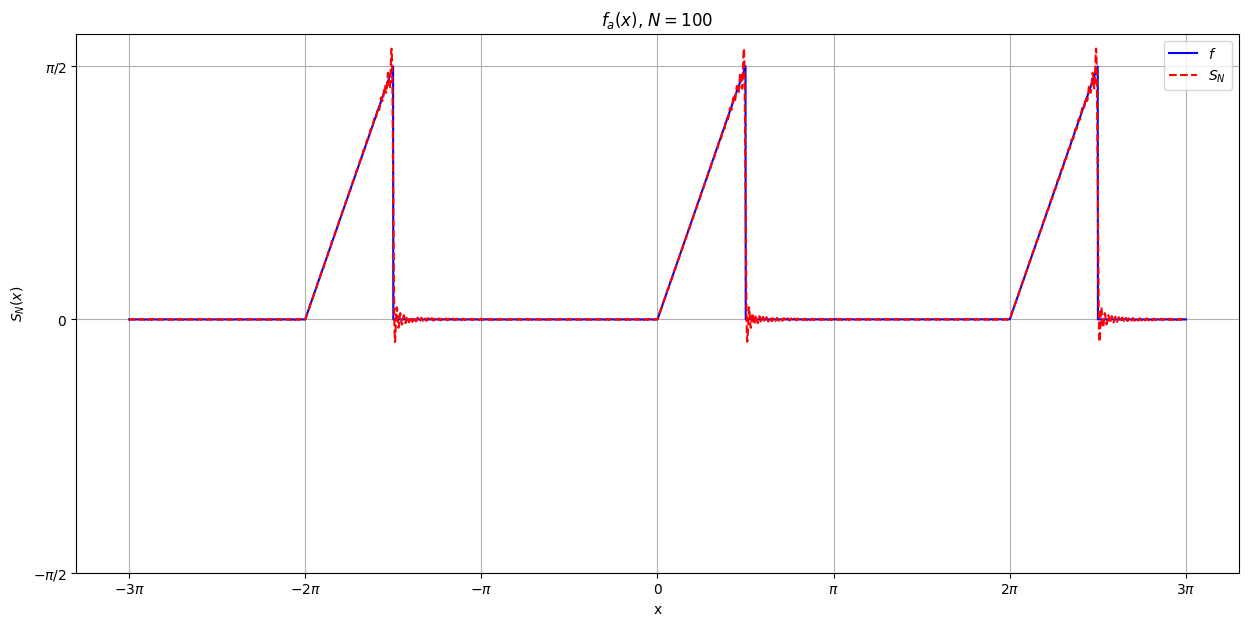

In [2]:
# Define f(x)
def f_a(x):
    x = (x + np.pi) % P - np.pi  # Map x into the interval [-pi, pi]
    return np.piecewise(x, [x < 0, (x >= 0) & (x <= np.pi/2), x > np.pi/2], [0, lambda x: x, 0])

# Define S_N_a(x, N)
def S_N_a(x, N):
    a_0 = np.pi/8
    s = np.full_like(x, a_0/2)
    for n in range(1, N+1):
        # Replace these with the correct values
        a_n = (-2 + 2*np.cos((n*np.pi)/2) + n*np.pi*np.sin((n*np.pi)/2))/(2*n**2*np.pi)
        b_n = ((-1/2) *n *np.pi *np.cos((n *np.pi)/2) + np.sin((n* np.pi)/2))/(n**2 *np.pi)
        s += a_n * np.cos(n * x) + b_n * np.sin(n * x)
    return s


for N in Ns:
    pps = lambda N: plot_partial_sum(f_a, x, S_N_a, N, title=r'$f_a(x)$, $N={}$'.format(N))
    pps(N)


#### Function $f(x)$ for Case b)

$$
f(x) = 
\begin{cases} 
0 & \text{if } - \pi < x < 0, \\
x & \text{if } 0 < x < \frac{\pi}{2}, \\
\pi - x & \text{if } \frac{\pi}{2} < x \leq \pi.
\end{cases}
$$

Similarly we can calculate $a_0$, $a_n$ and $b_n$:

$$
a_0 = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \, dx = \frac{1}{\pi} \left( \int_{0}^{\frac{\pi}{2}} x \, dx  + \int_{\frac{\pi}{2}}^{\pi} \pi - x \, dx\right) = \frac{\pi}{4}.
$$

$$
a_n = \frac{2\cos\left(\frac{\pi n}{2}\right) - \cos(\pi n) - 1}{\pi n^2}
$$

$$
b_n = \frac{2\sin\left(\frac{\pi n}{2}\right) - \sin(\pi n)}{\pi n^2}
$$

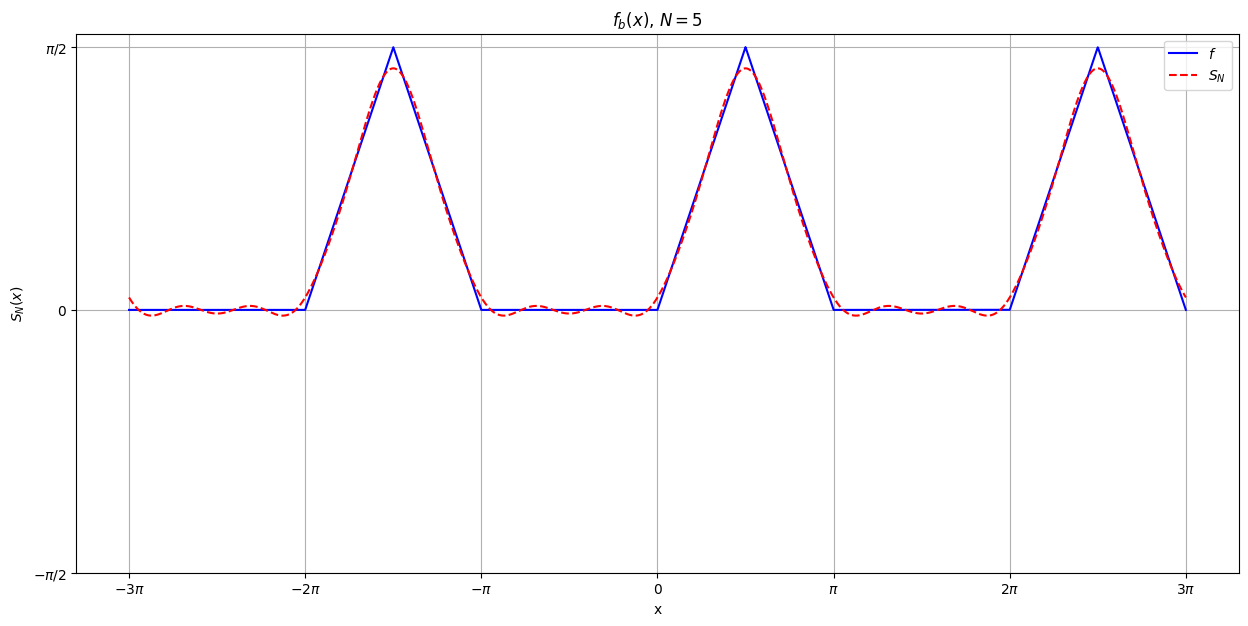

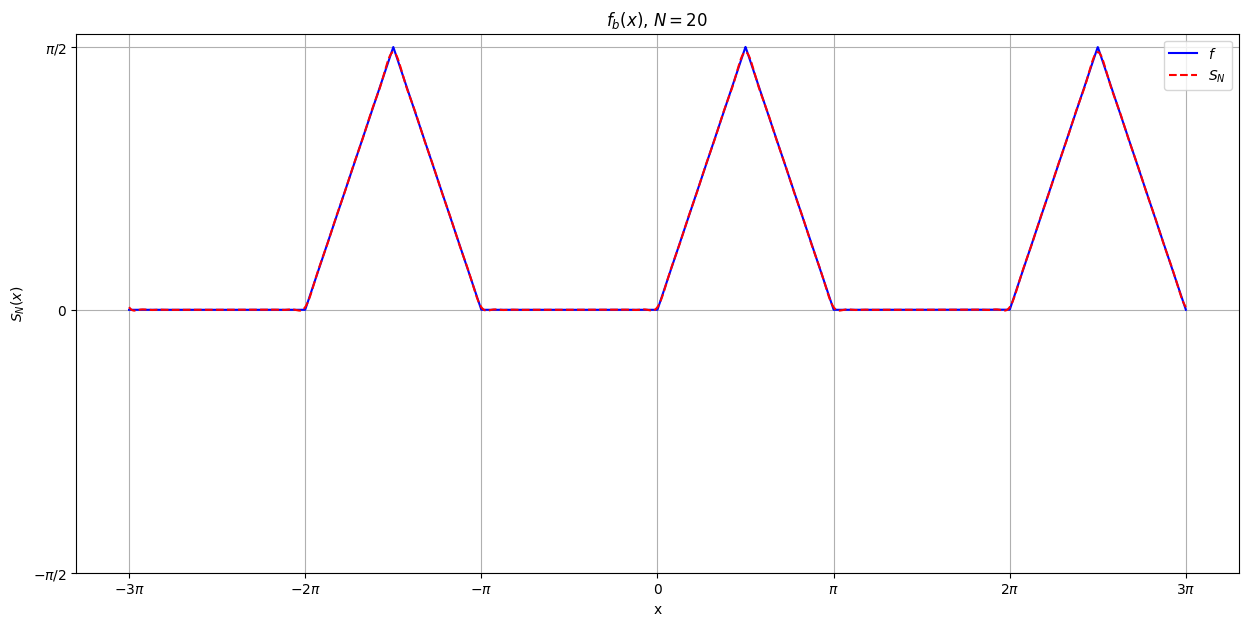

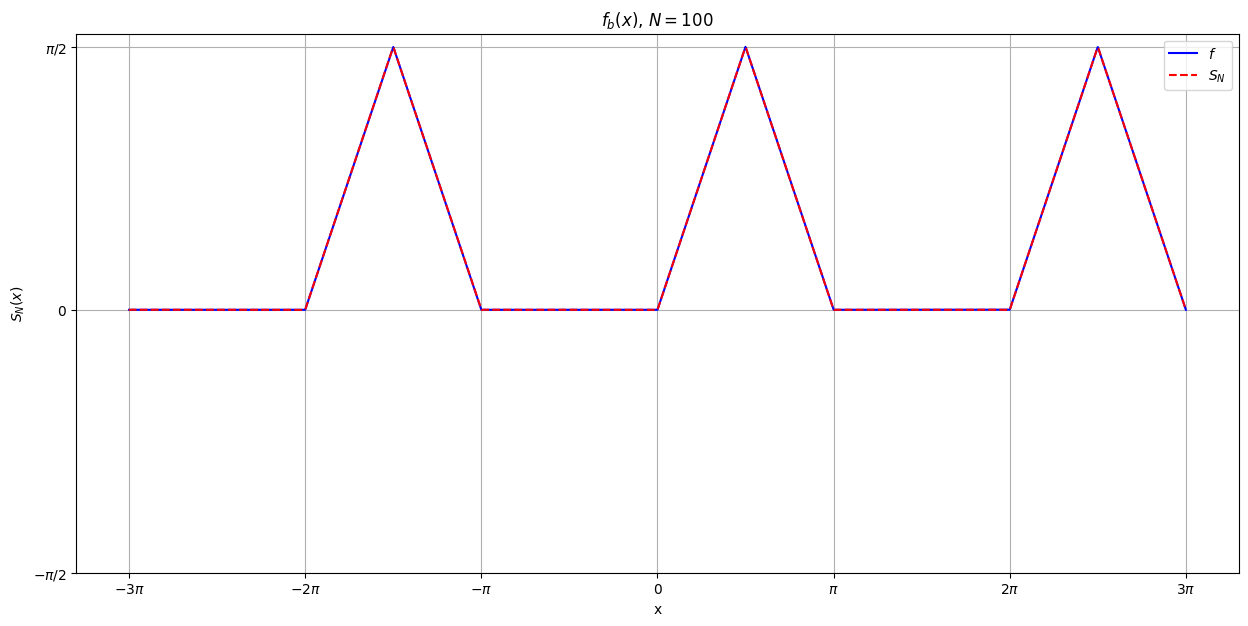

In [3]:
def f_b(x):
    x = (x + np.pi) % P - np.pi  # Map x into the interval [-pi, pi]
    return np.piecewise(x, [(x < 0) & (x > -np.pi), (x >= 0) & (x <= np.pi/2), (x > np.pi/2) & (x <= np.pi)], [0, lambda x: x, lambda x: np.pi - x])

    
# Define S_N_b(x, N) based on the new Fourier coefficients
def S_N_b(x, N):
    a_0 = np.pi/4
    s = np.full_like(x, a_0 / 2)  # Initialize the series with a_0/2
    for n in range(1, N+1):
        a_n = (2*np.cos(np.pi*n/2) - np.cos(np.pi*n) - 1) / (np.pi * n**2)
        b_n = (2*np.sin(np.pi*n/2) - np.sin(np.pi*n)) / (np.pi * n**2)
        s += a_n * np.cos(n * x) + b_n * np.sin(n * x)
    return s

for N in Ns:
    pps = lambda N: plot_partial_sum(f_b, x, S_N_b, N, title=r'$f_b(x)$, $N={}$'.format(N))
    pps(N)

#### Function $f(x)$ for Case c)

$$
f(x) = 
\begin{cases} 
-\pi - x & \text{if } - \pi < x < - \frac{\pi}{2}, \\
x & \text{if } - \frac{\pi}{2} < x < \frac{\pi}{2}, \\
\pi - x & \text{if } \frac{\pi}{2} < x \leq \pi.
\end{cases}
$$

$$
a_0 = \frac{1}{\pi} \left( \int_{-\pi}^{-\frac{\pi}{2}} - \pi - x \, dx + \int_{-\frac{\pi}{2}}^{\frac{\pi}{2}} x \, dx + \int_{\frac{\pi}{2}}^{\pi} \pi - x \, dx \right) = 0.
$$

$$
a_n = 0.
$$

$$
b_n = \frac{2(2 \sin(\frac{\pi n}{2}) - \sin(\pi n))}{\pi n^2}
$$

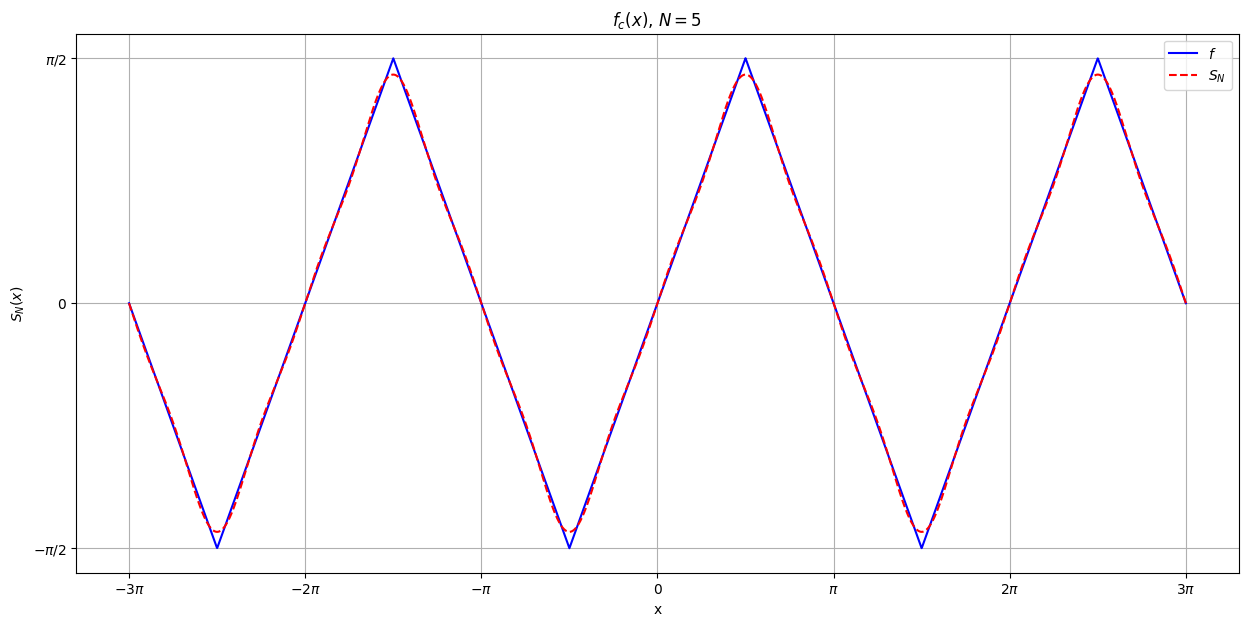

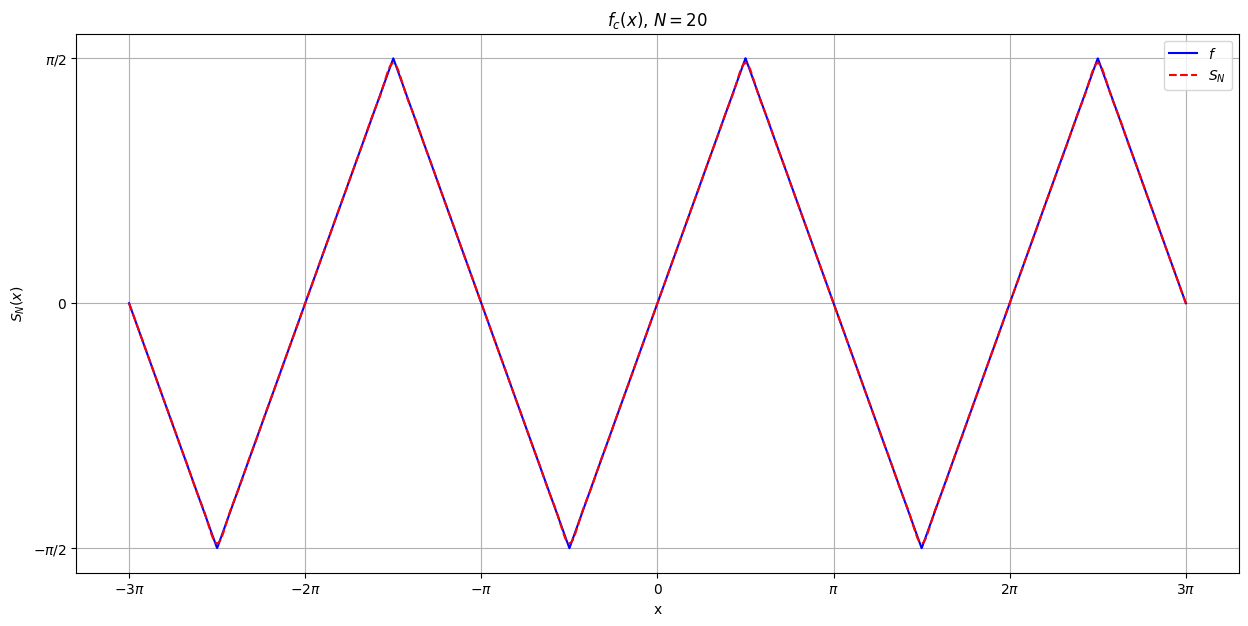

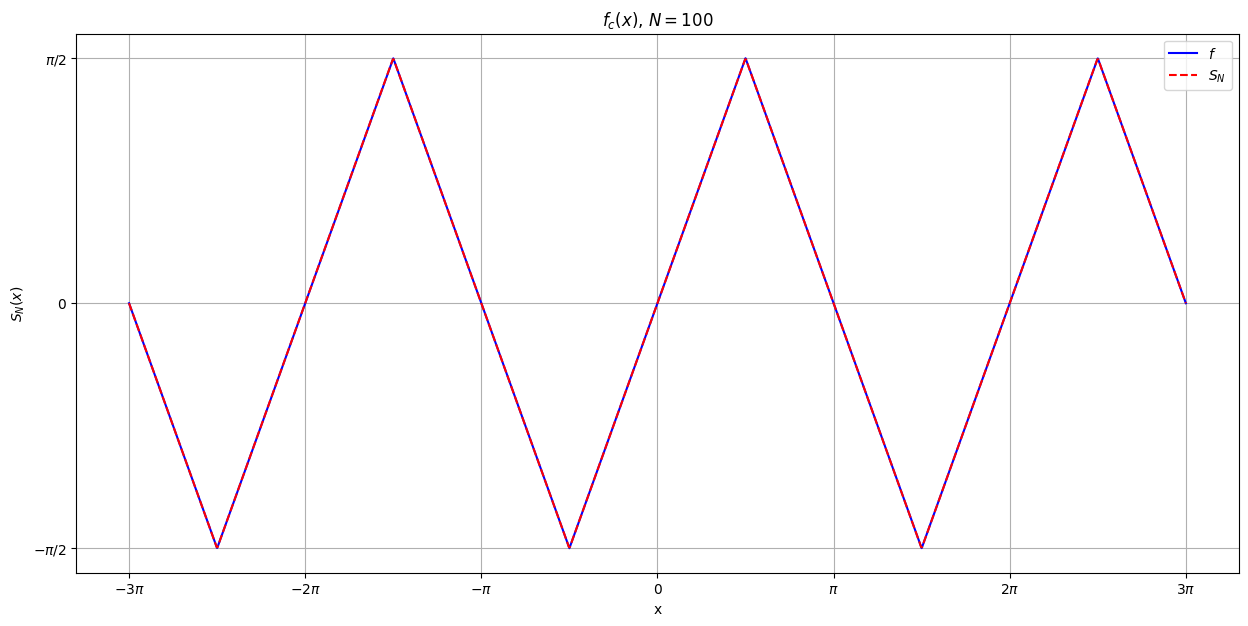

In [4]:
def f_c(x):
    x = (x + np.pi) % P - np.pi  # Map x into the interval [-pi, pi]
    conditions = [
        (x >= -np.pi) & (x < -np.pi / 2),
        (x >= -np.pi / 2) & (x < np.pi / 2),
        (x >= np.pi / 2) & (x <= np.pi)
    ]
    
    functions = [
        lambda x: -np.pi - x,
        lambda x: x,
        lambda x: np.pi - x
    ]
    
    return np.piecewise(x, conditions, functions)
    
# Define S_N_b(x, N) based on the new Fourier coefficients
def S_N_c(x, N):
    a_0 = 0
    s = np.full_like(x, a_0 / 2)  # Initialize the series with a_0/2
    for n in range(1, N+1):
        a_n = 0
        b_n = (2*(2*np.sin((np.pi*n/2))-np.sin(np.pi*n)))/(np.pi*n**2)
        s += a_n * np.cos(n * x) + b_n * np.sin(n * x)
    return s

for N in Ns:
    pps = lambda N: plot_partial_sum(f_c, x, S_N_c, N, title=r'$f_c(x)$, $N={}$'.format(N))
    pps(N)

---

## Problem 3: (Trigonometric Series)

See PDF

